### Cel ćwiczenia
-  Praktyczne zapoznanie się z klasyfikacją za pomocą drzew decyzyjnych oraz klasyfikatorem $k-NN$
-  Przyswojenie pojęć: *najbliższy sąsiad, pruning, walidacja krzyżowa*

##  Plan ćwiczenia: drzewa decyzyjne

### 1. Załaduj zbiory danych Titanic (treningowy i testowy), a następnie wyświetl nagłówek z nazwami cech oraz przykładowe rekordy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import plot_confusion_matrix

In [2]:
train = pd.read_csv('ed-titanic-training.csv')
test = pd.read_csv('ed-titanic-test.csv')
train.head(6)


,Unnamed: 0,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,0,3,1,1,0,0,0,0,2,0,1
1,1,1,1,0,2,0,3,1,1,2,0,3
2,2,1,3,0,1,0,1,0,0,1,1,4
3,3,1,1,0,2,0,3,0,1,2,0,3
4,4,0,3,1,2,0,1,0,0,1,1,1
5,5,0,3,1,1,0,1,2,0,1,1,1


In [3]:
test.head(6)

,Unnamed: 0,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,2,0,0,2,0,1,1,1
1,1,3,0,2,0,0,0,0,2,0,3
2,2,2,1,3,0,1,2,0,1,1,1
3,3,3,1,1,0,1,0,0,1,1,1
4,4,3,0,1,1,1,0,0,3,0,3
5,5,3,1,0,0,1,0,0,1,1,1


In [4]:
train.loc[train['Age'] >= 65, ['Age']] = 3
test.loc[test['Age'] >65, "Age"] = 3

In [5]:
train = train.drop(["Unnamed: 0"], axis = 1)

In [6]:
test = test.drop(["Unnamed: 0"], axis = 1)

### 2. Wyznacz korelację Pearsona pomiędzy cechami zbioru treningowego i dokonaj wizualizacji macierzy. Które cechy są najbardziej skorelowane z etykietą przeżycia? Które cechy są najbardziej skorelowane ze sobą?

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

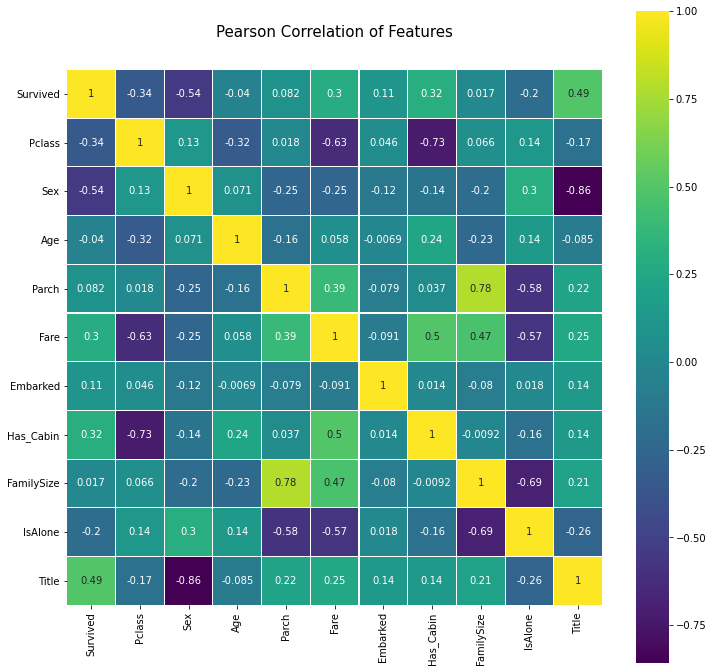

In [7]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)

## Obserwacje: 

Cechami najbardziej skorelowanymi z etykietą przeżycia są: Title oraz Sex, gdzie pierwsza z nich jest skorelowana dodatnio, a druga ujemnie. 

Najbardziej skorelowanymi cechami ze sobą są: (Parch, FamilySize), (Survived, Sex), (FamilySize, IsAlone), (Has_Cabin, Fare), (Sex, Title) czy (Pclass, Has_Cabin)

 ### 3. Korzystając ze zbioru treningowego, wyznacz współczynnik przeżywalności dla każdego z pięciu różnych tytułów (cechaTitle)

In [8]:
title_mapping = {1: "Mr", 2: "Master", 3: "Mrs", 4: "Miss", 5: "Rare"}
survived = train.loc[:,["Title", "Survived"]].groupby('Title', as_index = False).mean()
survived.Title = survived.Title.replace(title_mapping)
survived.index +=1


In [9]:
survived

,Title,Survived
1,Mr,0.156673
2,Master,0.575000
3,Mrs,0.793651
4,Miss,0.702703
5,Rare,0.347826


### 4. Korzystając ze zbioru treningowego oraz walidacji krzyżowej (10-fold) wyznacz najlepszą głębokość drzewa decyzyjnego (kryterium podziału gini albo entropy)

In [10]:
x = train.drop(['Survived'], axis=1)
y = train.Survived
x


,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,3,1,1,0,0,0,0,2,0,1
1,1,0,2,0,3,1,1,2,0,3
2,3,0,1,0,1,0,0,1,1,4
3,1,0,2,0,3,0,1,2,0,3
4,3,1,2,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
886,2,1,1,0,1,0,0,1,1,5
887,1,0,1,0,2,0,1,1,1,4
888,3,0,2,2,2,0,0,4,0,4
889,1,1,1,0,2,1,1,1,1,1


In [11]:
score = []
criteria = ['gini', 'entropy']
for i in criteria:
    print(f'Determining best max depth for {i} criterion:')
    for max_depth in range(1,15):
        dtc = DecisionTreeClassifier(max_depth=max_depth, criterion=i)
        res = cross_val_score(dtc, x, y, cv=10).mean()
        score.append(res)
        print(f'max depth = {max_depth}, result = {res}')
        

Determining best max depth for gini criterion:
max depth = 1, result = 0.7822846441947565
max depth = 2, result = 0.7912983770287141
max depth = 3, result = 0.8305243445692885
max depth = 4, result = 0.8125468164794007
max depth = 5, result = 0.8136953807740325
max depth = 6, result = 0.8070287141073657
max depth = 7, result = 0.8114856429463171
max depth = 8, result = 0.8081523096129837
max depth = 9, result = 0.821598002496879
max depth = 10, result = 0.8182646691635457
max depth = 11, result = 0.8126466916354558
max depth = 12, result = 0.8137827715355804
max depth = 13, result = 0.8182771535580523
max depth = 14, result = 0.8104119850187266
Determining best max depth for entropy criterion:
max depth = 1, result = 0.7822846441947565
max depth = 2, result = 0.7890511860174781
max depth = 3, result = 0.8316479400749064
max depth = 4, result = 0.8215355805243446
max depth = 5, result = 0.8271660424469414
max depth = 6, result = 0.8148564294631712
max depth = 7, result = 0.8103495630461

In [12]:
gini_score = score[:14]
entropy_score = score[14:]
max_depths = [i for i in range(1,15)]

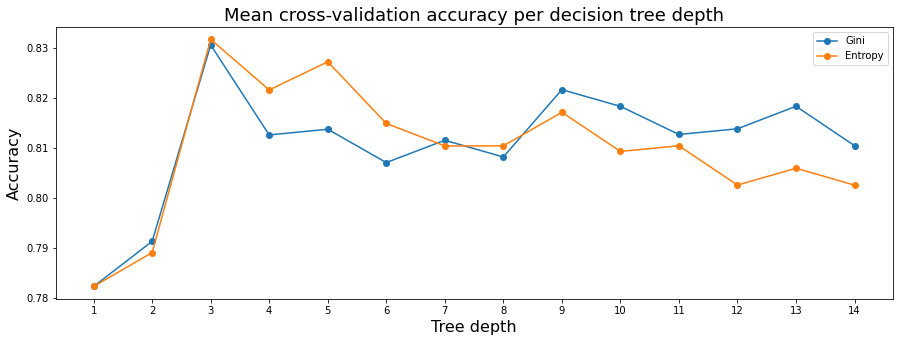

In [13]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(max_depths, gini_score, '-o', label='Gini')
ax.plot(max_depths, entropy_score, '-o', label='Entropy')
ax.set_xticks(max_depths)
ax.set_xlabel('Tree depth', fontsize=16)
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_title('Mean cross-validation accuracy per decision tree depth', fontsize=18)
ax.legend()

## Obserwacje:

Łatwo zauważyć, że dla obu krtyteriów najlepszą głębokością jest 3.

### 5. Zbuduj drzewo decyzyjne wykorzystując z wyznaczonej wcześniej maksymalnej głębokości (kryterium podziału gini lub entropy)

In [14]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 3,criterion='entropy')
decision_tree.fit(x, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### 6. Dokonaj predykcji możliwości przeżycia dla pasażerów ze zbioru testowego i zapisz wyniki w pliku

In [15]:
predicted = decision_tree.predict(test)

In [16]:
predicted

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [17]:
np.savetxt('decision-tree-prediction.txt', predicted, '%0.0f')

### 7. Korzystając  z  biblioteki  Graphviz  zwizualizuj  drzewo  decyzyjne

In [18]:
tree.export_graphviz(decision_tree,
                     out_file="tree.dot",
                     feature_names = list(x), 
                     class_names=['Died', 'Survived'],
                     filled = True)

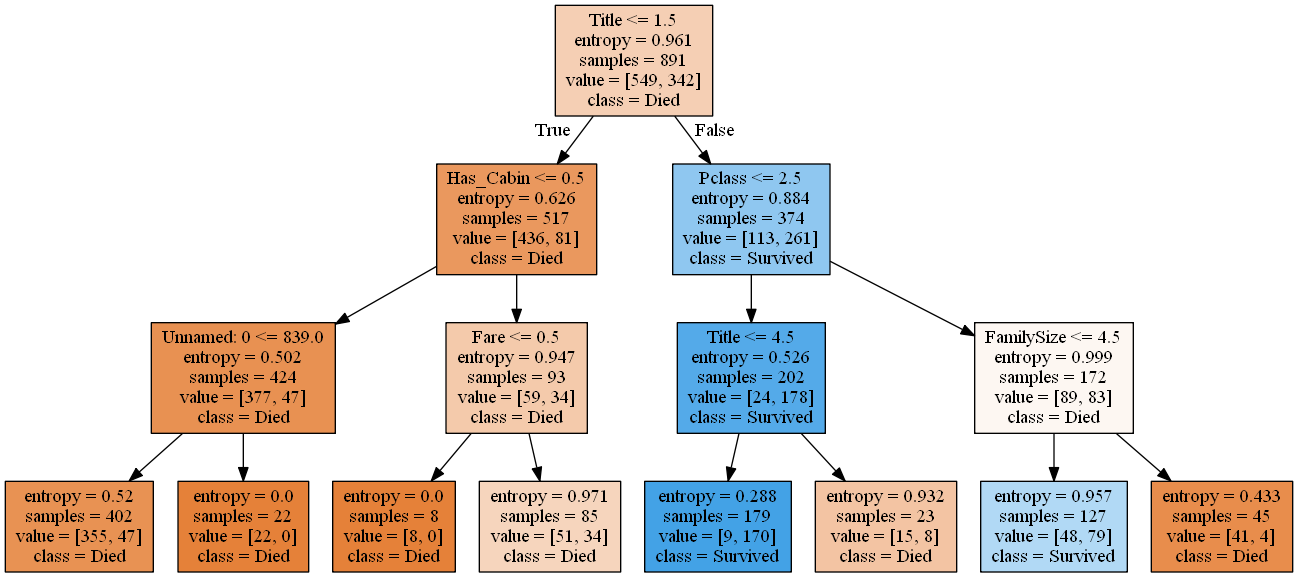

In [19]:
from IPython.display import Image

Image("tree.png", width = 600, height = 300)

In [20]:
text_representation = tree.export_text(decision_tree)
print(text_representation)

|--- feature_9 <= 1.50
|   |--- feature_6 <= 0.50
|   |   |--- feature_7 <= 3.50
|   |   |   |--- class: 0
|   |   |--- feature_7 >  3.50
|   |   |   |--- class: 0
|   |--- feature_6 >  0.50
|   |   |--- feature_4 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  0.50
|   |   |   |--- class: 0
|--- feature_9 >  1.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_9 <= 4.50
|   |   |   |--- class: 1
|   |   |--- feature_9 >  4.50
|   |   |   |--- class: 0
|   |--- feature_0 >  2.50
|   |   |--- feature_7 <= 4.50
|   |   |   |--- class: 1
|   |   |--- feature_7 >  4.50
|   |   |   |--- class: 0



### 8. Sprawdź  jak  na  dokładność  klasyfikacji  wpływają  następujące  parametry  drzewa:  kryterium  podziału  (gini vs. entropy),  najmniejsza  liczba rekordów w liściu oraz maksymalna głębokość drzewa

In [21]:
criteria = ['gini', 'entropy']

for criterion in criteria:
    print(f' \n Determining how {criterion} criterion factors to the classifier\'s accuracy:')
    for min_samples_leaf in range(1,5):
        print(f'\n min_samples_leaf = {min_samples_leaf}')
        for max_depth in range(1,10):
            dtc = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
            result = cross_val_score(dtc, x, y, cv=10).mean()
            print(f"max_depth: {max_depth}", f"min_sample_leaf: {min_samples_leaf}", f"result: {result}")

 
 Determining how gini criterion factors to the classifier's accuracy:

 min_samples_leaf = 1
max_depth: 1 min_sample_leaf: 1 result: 0.7822846441947565
max_depth: 2 min_sample_leaf: 1 result: 0.7912983770287141
max_depth: 3 min_sample_leaf: 1 result: 0.8305243445692885
max_depth: 4 min_sample_leaf: 1 result: 0.8125468164794007
max_depth: 5 min_sample_leaf: 1 result: 0.8125717852684143
max_depth: 6 min_sample_leaf: 1 result: 0.8081523096129837
max_depth: 7 min_sample_leaf: 1 result: 0.8103620474406992
max_depth: 8 min_sample_leaf: 1 result: 0.8115230961298376
max_depth: 9 min_sample_leaf: 1 result: 0.823845193508115

 min_samples_leaf = 2
max_depth: 1 min_sample_leaf: 2 result: 0.7822846441947565
max_depth: 2 min_sample_leaf: 2 result: 0.7912983770287141
max_depth: 3 min_sample_leaf: 2 result: 0.8305243445692885
max_depth: 4 min_sample_leaf: 2 result: 0.8125468164794007
max_depth: 5 min_sample_leaf: 2 result: 0.8148189762796504
max_depth: 6 min_sample_leaf: 2 result: 0.812634207240948

Kryterium podziału entropy daje lepsze wyniki dla małych parametrów. Dla większych parametrów lepsze okazuje się gini. 

Parametr max_depth wpływa na maksymmalną głębokość drzewa. Im większa liczba, tym więcej wygeneruje nam liści. Możemy zauważyć, że znacząco wpłwa na otrzymywane wyniki. Po przekroczeniu najlepszej maksymalnej głębokości wyniki znacząco się pogarszają.

Min_samples_leaf wyznacza ile minimalnych próbek może być w jednum liściu. Wpływa na płynność modelu.

### 9. Podziel zbiór treningowy (dla którego mamy dostępne etykiety) na nowy zbiór treningowy (75%) i nowy zbiór testowy (25%)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

### 10. Wyznacz i dokonaj wizualizacji macierzy rozbieżności $confusion \hspace{0.1cm} matrix$

Text(0.5, 1.0, 'Confusion matrix, without normalization')

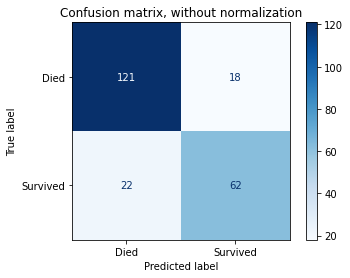

In [23]:
class_names=['Died', 'Survived']
dtc = tree.DecisionTreeClassifier(max_depth=3, random_state=0, criterion='entropy')
model = dtc.fit(X_train, y_train)
cf_matrix = plot_confusion_matrix(model, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues, normalize=None)
plt.title("Confusion matrix, without normalization")

### 11. Wyznacz następujące miary jakości zbudowanego klasyfikatora:
- accuracy
- f1-score
- average precision-recall

In [24]:
y_pred = dtc.predict(X_test)
print(f'Accuracy score = {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy score = 0.820627802690583
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       139
           1       0.78      0.74      0.76        84

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



 ## Plan ćwiczenia: klasyfikator $k-NN$

### Przetestuj  działanie  klasyfikatora  najbliższego  sąsiada  na  zbiorach  danych: Iris oraz NYT (wymiarowość zredukowana do 10 za pomocą PCA)

### Wykorzystując  dziesięciokrotną  walidację  krzyżową  zmierz  dokład-ność klasyfikacji dla 

$$k= 1,k= 3,k= 5,k= 7$$

### Zbadaj wpływ wprowadzenia wag odległości oraz innej miary odległości (Euklidesowa vs. Taxi) na rezultaty klasyfikacji

In [25]:
iris = load_iris()

X, y = load_iris(return_X_y=True)



In [26]:
from sklearn.neighbors import KNeighborsClassifier as KNN
for k in [1,3,5,7]:
    print(f'\n Measuring accuracy of the KNN model with {k} neighbours')
    for metric in ['euclidean', 'manhattan' ]:
        print(f'\n Metric = {metric}')
        for weights in ['uniform', 'distance']:
            knn = KNN(n_neighbors = k, metric = metric, weights = weights)
            res = cross_val_score(knn, X, y, cv=10).mean()
            print(f'weights = {weights}, result = {res}')


 Measuring accuracy of the KNN model with 1 neighbours

 Metric = euclidean
weights = uniform, result = 0.96
weights = distance, result = 0.96

 Metric = manhattan
weights = uniform, result = 0.96
weights = distance, result = 0.96

 Measuring accuracy of the KNN model with 3 neighbours

 Metric = euclidean
weights = uniform, result = 0.9666666666666666
weights = distance, result = 0.9666666666666666

 Metric = manhattan
weights = uniform, result = 0.96
weights = distance, result = 0.96

 Measuring accuracy of the KNN model with 5 neighbours

 Metric = euclidean
weights = uniform, result = 0.9666666666666668
weights = distance, result = 0.9666666666666668

 Metric = manhattan
weights = uniform, result = 0.9666666666666668
weights = distance, result = 0.9666666666666668

 Measuring accuracy of the KNN model with 7 neighbours

 Metric = euclidean
weights = uniform, result = 0.9666666666666668
weights = distance, result = 0.9666666666666668

 Metric = manhattan
weights = uniform, result =

Wykorzystanie obu metryk dla zbioru irysów daje podobne wyniki. Wybór wag odgrywa większe znaczenie, gdy bierzemy większą liczbę sąsiadów. Liczba sąsiadów również widocznie wpływa na wyniki modelu.

In [27]:
df = pd.read_csv('nyt-frame.csv', header = 0, index_col = 0)
df

,class.labels,X.,X.d,X.nd,X.s,X.th,X.this,a,abandoned,abc,...,yorkers,yorks,you,young,younger,your,youre,youth,youthful,yu
1,art,0.008707,0.0,0.0,0.000000,0.009251,0.0,0.007564,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,art,0.005848,0.0,0.0,0.000000,0.000000,0.0,0.001418,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,art,0.016036,0.0,0.0,0.011403,0.000000,0.0,0.010063,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,art,0.026415,0.0,0.0,0.000000,0.000000,0.0,0.008677,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
5,art,0.007285,0.0,0.0,0.011008,0.000000,0.0,0.008390,0.0,0.0,...,0.000000,0.0,0.048151,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,music,0.006929,0.0,0.0,0.000000,0.000000,0.0,0.005600,0.0,0.0,...,0.000000,0.0,0.024425,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
99,music,0.111882,0.0,0.0,0.000000,0.000000,0.0,0.003716,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
100,music,0.006550,0.0,0.0,0.000000,0.000000,0.0,0.009301,0.0,0.0,...,0.000000,0.0,0.029686,0.015659,0.0,0.026605,0.0,0.0,0.0,0.0
101,music,0.009497,0.0,0.0,0.000000,0.040362,0.0,0.003070,0.0,0.0,...,0.000000,0.0,0.066953,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [28]:
data = df.iloc[:,9:]
array = data.values
y_nyt = np.array(df['class.labels'])

In [29]:
pca = PCA(n_components = 10)
X_pca = pca.fit_transform(array)

In [30]:
from sklearn.neighbors import KNeighborsClassifier as KNN
for k in [1,3,5,7]:
    print(f'\n Measuring accuracy of the KNN model with {k} neighbours')
    for metric in ['euclidean', 'manhattan' ]:
        print(f'\n Metric = {metric}')
        for weights in ['uniform', 'distance']:
            knn = KNN(n_neighbors = k, metric = metric, weights = weights)
            res = cross_val_score(knn, X_pca, y_nyt, cv=10).mean()
            print(f'weights = {weights}, result = {res}')


 Measuring accuracy of the KNN model with 1 neighbours

 Metric = euclidean
weights = uniform, result = 0.8718181818181818
weights = distance, result = 0.8718181818181818

 Metric = manhattan
weights = uniform, result = 0.8627272727272727
weights = distance, result = 0.8627272727272727

 Measuring accuracy of the KNN model with 3 neighbours

 Metric = euclidean
weights = uniform, result = 0.8709090909090909
weights = distance, result = 0.8709090909090909

 Metric = manhattan
weights = uniform, result = 0.8709090909090909
weights = distance, result = 0.8709090909090909

 Measuring accuracy of the KNN model with 5 neighbours

 Metric = euclidean
weights = uniform, result = 0.860909090909091
weights = distance, result = 0.860909090909091

 Metric = manhattan
weights = uniform, result = 0.8309090909090908
weights = distance, result = 0.840909090909091

 Measuring accuracy of the KNN model with 7 neighbours

 Metric = euclidean
weights = uniform, result = 0.850909090909091
weights = distan

Możemy zauważyć, że w większości przypadków użycie metryki euklidesowej dla zbioru new york times daje lepsze wyniki niż zastosowanie metryki taksówkowej. Większa liczba sąsiadów wpływa pozytywnie na wyniki dla obu metryk, natomiast wybór wag nie odgrywa większego znaczenia.